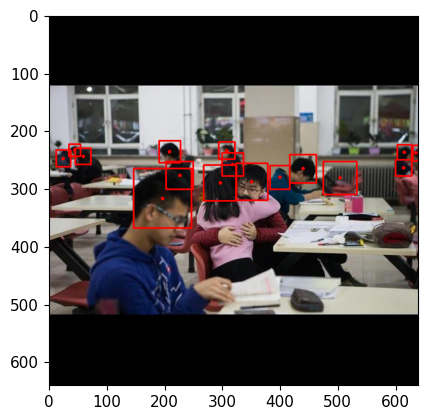

In [19]:
# yolov7 tiny 모델 이미지 테스트 (64 - 30)
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# path = r'.\yolov7\pt\yolov7.pt' # 기본모델
# path = r'.\yolov7\save_model\yolov7_tiny_haed_finetuned_128_15\train_result\weights\best.pt'
path = r'.\yolov7\save_model\yolov7_tiny_haed_finetuned_64_30\train_result\weights\best.pt'
model = torch.hub.load("WongKinYiu/yolov7","custom",f"{path}",trust_repo=True)
model = model.to(device)

import module.Tracking as tr
import importlib
importlib.reload(tr)
%matplotlib inline

# img_path = r"..\01.Data\01\train\1301\1301\rgb\rgb_0014.png"
img_path = r"..\01.Data\head\train_resized\images\PartB_00001_jpg.rf.5da7430323629b957f5f845377d6d312.jpg"
# img_path = r"..\01.Data\head\origin\train\images\PartB_00001_jpg.rf.71ea28a4964b290becca79eafb8e38f7.jpg"

track_image = tr.Tracking(model)
img = track_image.track_image(img_path)

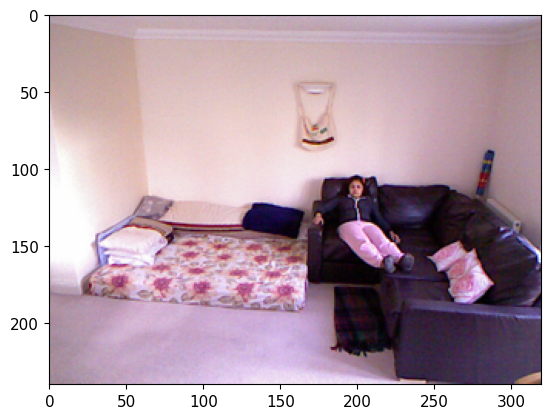

In [4]:
# yolov7 tiny 모델 영상 테스트  (128 - 15)
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# path = r'.\yolov7\pt\yolov7.pt' # 기본모델
path = r'.\yolov7\save_model\yolov7_tiny_haed_finetuned_128_15\train_result\weights\best.pt'
# path = r'.\yolov7\save_model\yolov7_tiny_haed_finetuned_64_30\train_result\weights\best.pt'
model = torch.hub.load("WongKinYiu/yolov7","custom",f"{path}",trust_repo=True)
model = model.to(device)

# 폴더에 있는 이미지 전부 해보고 영상으로 만들기
from glob import glob
import cv2
img_path_lst = glob(r"..\01.Data\01\train\1301\1301\rgb\*")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 15
width = cv2.imread(img_path_lst[0]).shape[1]
height = cv2.imread(img_path_lst[0]).shape[0]
writer = cv2.VideoWriter("img_test.mp4", fourcc, fps, (width, height)) 
        
for i, img_path in enumerate(img_path_lst):
    if i == 200:
        break
    img = track_image.track_image(img_path)
    writer.write(img)

writer.release()

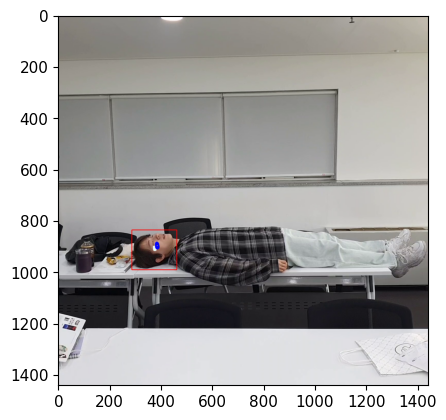

In [22]:
# 모델 영상 테스트
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
path = r'.\yolov7\save_model\yolov7_tiny_haed_finetuned_64_30\train_result\weights\best.pt' # 수정할곳
model = torch.hub.load(".\yolov7", "custom", path, source="local")
model.conf = 0.7
model = model.to(device)

# yolov7 비디오 테스트
import module.Tracking as tr
import importlib
importlib.reload(tr)
%matplotlib inline
falldown_video_path = r".\test_video\falldown_large.mp4"
falldown_save_path = r"..\101.ppt\video\v7_tiny_head_64_30_falldwon_large.mp4" # 수정할곳
# falldown_video_path = r".\test_video\falldown_small.mp4"
# falldown_save_path = r"..\101.ppt\video\v7_tiny_head_64_30_falldown_small.mp4" # 수정할곳
sleep_video_path = r".\test_video\sleep_large.mp4"
sleep_save_path = r"..\101.ppt\video\v7_tiny_head_64_30_sleep_large.mp4" # 수정할곳
# sleep_video_path = r".\test_video\sleep_small.mp4"
# sleep_save_path = r"..\101.ppt\video\v7_tiny_head_64_30_sleep_small.mp4" # 수정할곳
obj_thres = 100 
update_thres = 40 
tracking_count = 50
track_video = tr.Tracking(model)
# ps_route, ps_dist = track_video.track_video(obj_thres, update_thres, tracking_count, video_path, True) # 샘플만 확인, 저장안함

# falldown 영상 
ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, falldown_video_path, False, falldown_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)

# 결과 파일로 저장
import os
import json
result_save_root = r"test_video\tracking"
result_save_file = falldown_save_path.split("\\")[-1].split(".")[0] + ".json"
result_save_path = os.path.join(result_save_root, result_save_file)

result_falldown = {"ps_route" : ps_route, "ps_dist" : ps_dist, "ps_all_route" : ps_all_route, "recognized_count" : recognized_count}

with open(result_save_path, "w") as f:
    json.dump(result_falldown, f)
    
# # sleep 영상 
ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, sleep_video_path, False, sleep_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)

# 결과 파일로 저장
result_save_root = r"test_video\tracking"
result_save_file = sleep_save_path.split("\\")[-1].split(".")[0] + ".json"
result_save_path = os.path.join(result_save_root, result_save_file)

result_falldown = {"ps_route" : ps_route, "ps_dist" : ps_dist, "ps_all_route" : ps_all_route, "recognized_count" : recognized_count}

with open(result_save_path, "w") as f:
    json.dump(result_falldown, f)

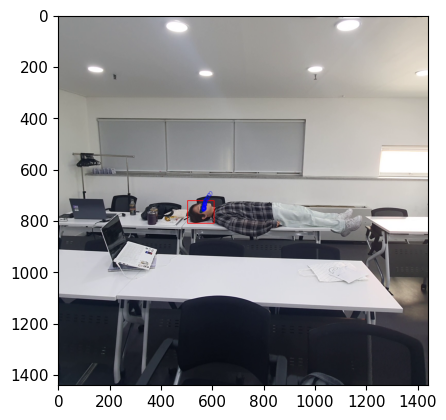

In [25]:
# 모델 영상 테스트
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# path = r'.\yolov7\save_model\yolov7_tiny_haed_finetuned_64_30\train_result\weights\best.pt' # 수정할곳
path = r'.\yolov7\save_model\yolov7_e6_head_finetuned_32_30\best.pt' # 수정할곳
model = torch.hub.load(".\yolov7", "custom", path, source="local")
model.conf = 0.7 # Confidence Threshold 설정
model = model.to(device)

# yolov7 비디오 테스트
import module.Tracking as tr
import importlib
importlib.reload(tr)
%matplotlib inline
# falldown_video_path = r".\test_video\falldown_large.mp4"
# falldown_save_path = r"..\101.ppt\video\v7_e6_head_32_30_falldown_large.mp4" # 수정할곳
falldown_video_path = r".\test_video\falldown_small.mp4"
falldown_save_path = r"..\101.ppt\video\v7_e6_head_32_30_falldown_small.mp4" # 수정할곳
# sleep_video_path = r".\test_video\sleep_large.mp4"
# sleep_save_path = r"..\101.ppt\video\v7_e6_head_32_30_sleep_large.mp4" # 수정할곳
sleep_video_path = r".\test_video\sleep_small.mp4"
sleep_save_path = r"..\101.ppt\video\v7_e6_head_32_30_sleep_small.mp4" # 수정할곳
obj_thres = 100 
update_thres = 40 
tracking_count = 50
track_video = tr.Tracking(model)
# ps_route, ps_dist = track_video.track_video(obj_thres, update_thres, tracking_count, video_path, True) # 샘플만 확인, 저장안함

# falldown 영상 
ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, falldown_video_path, False, falldown_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)

# 결과 파일로 저장
import os
import json
result_save_root = r"test_video\tracking"
result_save_file = falldown_save_path.split("\\")[-1].split(".")[0] + ".json"
result_save_path = os.path.join(result_save_root, result_save_file)

result_falldown = {"ps_route" : ps_route, "ps_dist" : ps_dist, "ps_all_route" : ps_all_route, "recognized_count" : recognized_count}

with open(result_save_path, "w") as f:
    json.dump(result_falldown, f)
    
# # sleep 영상 
ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, sleep_video_path, False, sleep_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)

# 결과 파일로 저장
result_save_root = r"test_video\tracking"
result_save_file = sleep_save_path.split("\\")[-1].split(".")[0] + ".json"
result_save_path = os.path.join(result_save_root, result_save_file)

result_falldown = {"ps_route" : ps_route, "ps_dist" : ps_dist, "ps_all_route" : ps_all_route, "recognized_count" : recognized_count}

with open(result_save_path, "w") as f:
    json.dump(result_falldown, f)

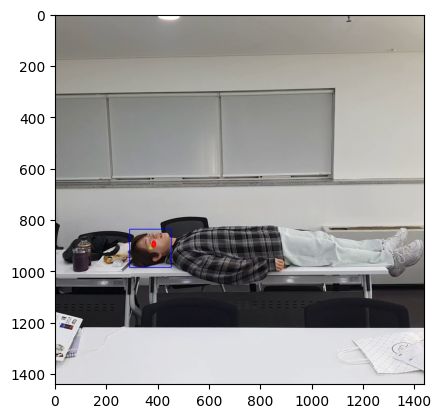

In [16]:
# v8 모델 영상 테스트
import torch
from ultralytics import YOLO

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
path = r'.\yolov7\save_model\yolov8_nano_head_finetuned_64_30\yolov8_best.pt'
from ultralytics import YOLO
model = YOLO(path) # load the model
model = model.to(device)

# yolov8 비디오 테스트
import module.Tracking as tr
import importlib
importlib.reload(tr)
# %matplotlib inline
falldown_video_path = r".\test_video\falldown_large.mp4"
falldown_save_path = r"..\101.ppt\video\v8_nano_head_64_30_falldwon_large.mp4" # 수정할곳
# falldown_video_path = r".\test_video\falldown_small.mp4"
# falldown_save_path = r"..\101.ppt\video\v8_nano_head_64_30_falldwon_small.mp4" # 수정할곳
sleep_video_path = r".\test_video\sleep_large.mp4"
sleep_save_path = r"..\101.ppt\video\v8_nano_head_64_30_sleep_large.mp4" # 수정할곳
# sleep_video_path = r".\test_video\sleep_small.mp4"
# sleep_save_path = r"..\101.ppt\video\v8_nano_head_64_30_sleep_small.mp4" # 수정할곳
obj_thres = 100 
update_thres = 40 
tracking_count = 50
track_video = tr.Tracking(model, True)
# ps_route, ps_dist = track_video.track_video(obj_thres, update_thres, tracking_count, video_path, True) # 샘플만 확인, 저장안함

# falldown 영상 
ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, falldown_video_path, False, falldown_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)

# 결과 파일로 저장
import os
import json
result_save_root = r"test_video\tracking"
result_save_file = falldown_save_path.split("\\")[-1].split(".")[0] + ".json"
result_save_path = os.path.join(result_save_root, result_save_file)

result_falldown = {"ps_route" : ps_route, "ps_dist" : ps_dist, "ps_all_route" : ps_all_route, "recognized_count" : recognized_count}

with open(result_save_path, "w") as f:
    json.dump(result_falldown, f)
    
# # sleep 영상 
ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, sleep_video_path, False, sleep_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)

# 결과 파일로 저장
result_save_root = r"test_video\tracking"
result_save_file = sleep_save_path.split("\\")[-1].split(".")[0] + ".json"
result_save_path = os.path.join(result_save_root, result_save_file)

result_falldown = {"ps_route" : ps_route, "ps_dist" : ps_dist, "ps_all_route" : ps_all_route, "recognized_count" : recognized_count}

with open(result_save_path, "w") as f:
    json.dump(result_falldown, f)

In [26]:
# 모델 평가
from glob import glob
import json

result_path = r".\test_video\tracking"
result = glob(result_path + r"\*")


for file in result:

    with open (file, "r") as f:
        dic = json.load(f)
        recognized_count = dic["recognized_count"]
        name = file.split("\\")[-1].split(".")[0]
        
    print(f"{name} : {recognized_count}")




v10_nano_head_64_30_falldown_small : 61
v10_nano_head_64_30_falldwon_large : 114
v10_nano_head_64_30_sleep_large : 158
v10_nano_head_64_30_sleep_small : 138
v5_medium_head_64_30_falldown_small : 112
v5_medium_head_64_30_falldwon_large : 117
v5_medium_head_64_30_sleep_large : 161
v5_medium_head_64_30_sleep_small : 147
v5_small_head_64_30_falldown_small : 88
v5_small_head_64_30_falldwon_large : 116
v5_small_head_64_30_sleep_large : 161
v5_small_head_64_30_sleep_small : 147
v7_e6_head_32_30_falldown_large : 100
v7_e6_head_32_30_falldown_small : 53
v7_e6_head_32_30_sleep_large : 158
v7_e6_head_32_30_sleep_small : 146
v7_tiny_head_64_30_falldown_small : 74
v7_tiny_head_64_30_falldwon_large : 114
v7_tiny_head_64_30_sleep_large : 160
v7_tiny_head_64_30_sleep_small : 147
v8_nano_head_64_30_falldwon_large : 110
v8_nano_head_64_30_falldwon_small : 53
v8_nano_head_64_30_sleep_large : 156
v8_nano_head_64_30_sleep_small : 118


In [ ]:
# 인퍼런스 속도 체크
import torch
import cv2
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
path = r'.\yolov7\save_model\yolov7_tiny_haed_finetuned_64_30\train_result\weights\best.pt'
model = torch.hub.load("WongKinYiu/yolov7","custom",f"{path}",trust_repo=True)
model = model.to(device)
model.conf = 0.7
speed_test_path = r"..\01.Data\head\valid_resized\images\PartB_00000_jpg.rf.433c77013eff2c84abfe0e3edeea9110.jpg"
img = cv2.imread(speed_test_path)
start = time.time()
model(img)
end = time.time()
print(f"{end - start:.5f} sec")


In [ ]:
# 인퍼런스 속도 체크
import torch
import cv2
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
path = r'.\yolov7\save_model\yolov7_e6_head_finetuned_32_30\best.pt' # 수정할곳
model = torch.hub.load("WongKinYiu/yolov7","custom",f"{path}",trust_repo=True)
model = model.to(device)
model.conf = 0.7
speed_test_path = r"..\01.Data\head\valid_resized\images\PartB_00000_jpg.rf.433c77013eff2c84abfe0e3edeea9110.jpg"
img = cv2.imread(speed_test_path)
start = time.time()
model(img)
end = time.time()
print(f"{end - start:.5f} sec")

In [43]:
# 인퍼런스 속도 체크
import cv2
import time
import torch
from ultralytics import YOLO

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
path = r'.\yolov7\save_model\yolov8_nano_head_finetuned_64_30\yolov8_best.pt'
model = YOLO(path) # load the model
model = model.to(device)

speed_test_path = r"..\01.Data\head\valid_resized\images\PartB_00000_jpg.rf.433c77013eff2c84abfe0e3edeea9110.jpg"
img = cv2.imread(speed_test_path)
start = time.time()
model(img, True)
end = time.time()
print(f"{end - start:.5f} sec")

0.11399 sec
